In [1]:
import gymnasium as gym
from agilerl.components.replay_buffer import ReplayBuffer
from agilerl.algorithms.ddpg import DDPG
from pettingzoo.sisl import multiwalker_v9
import numpy as np


# Create environment and Experience Replay Buffer
num_envs = 1
# env = multiwalker_v9.parallel_env(render_mode='human')
env = multiwalker_v9.parallel_env(forward_reward=100)
env.reset()
try:
    state_dim = [env.observation_space(agent).shape[0] for agent in env.agents]
    one_hot = False
    
except Exception:
    state_dim = [env.observation_space(agent).n for agent in env.agents]
    one_hot = True
# Requires one-hot encoding
try:
    action_dim = [env.action_space(agent).shape[0] for agent in env.agents]
except Exception:
    action_dim = [env.action_space(agent).n for agent in env.agents]
    
field_names = ["state", "action", "reward", "next_state", "done"]
memory = ReplayBuffer(memory_size=300, field_names=field_names, action_dim=action_dim[0])
agent = DDPG(state_dim=state_dim, action_dim=action_dim[0], one_hot=one_hot)   # Create DDPG agent
reward_evolution = []
rewards = []

for i in range(2000):
    print(i, "th iteration \nrewards mean : ", np.sum(rewards))
    reward_evolution.append(np.sum(rewards))
    
    state = env.reset()[0]  # Reset environment at start of episode
    state = state['walker_0']
    done = [False]
    rewards = []
    

    while done[0] == False:
        action = agent.getAction(state)[0]    # Get next action from agent
        actions = {agent: action for agent in env.agents}
        next_state, reward, done, _, _ = env.step(actions)   # Act in environment
        if 'walker_0' in next_state.keys():
            next_state = next_state['walker_0']
            done = [True] if done['walker_0'] or done['walker_1'] or done['walker_2'] else [False]
        else :
            next_state = np.empty((31,))
            done = [True]
        reward = reward['walker_0']
        rewards.append(reward)
        memory.save2memory(state, action, reward, next_state, done)

        state = next_state

        # Learn according to learning frequency
        if len(memory) >= agent.batch_size:
            experiences = memory.sample(agent.batch_size) # Sample replay buffer
            agent.learn(experiences)    # Learn according to agent's RL algorithm


0 th iteration 
rewards mean :  0.0
1 th iteration 
rewards mean :  -57.32172707716639
2 th iteration 
rewards mean :  133.0530591423547
3 th iteration 
rewards mean :  125.79144413738216
4 th iteration 
rewards mean :  116.61418246013106
5 th iteration 
rewards mean :  4.748723304364526
6 th iteration 
rewards mean :  183.69945132484054
7 th iteration 
rewards mean :  343.9436884131284
8 th iteration 
rewards mean :  47.870336268097006
9 th iteration 
rewards mean :  233.83622152730777
10 th iteration 
rewards mean :  106.72254771382254
11 th iteration 
rewards mean :  97.8403034791695
12 th iteration 
rewards mean :  -382.46137360731797
13 th iteration 
rewards mean :  161.64096287141257
14 th iteration 
rewards mean :  95.83041508992467
15 th iteration 
rewards mean :  52.674520798027665
16 th iteration 
rewards mean :  411.7309248059369
17 th iteration 
rewards mean :  215.7359581448447
18 th iteration 
rewards mean :  633.5651569068426
19 th iteration 
rewards mean :  329.20755922

In [2]:

import os
# Save the trained algorithm
path = "./models/ONE_DDPG"
filename = "DDPG5_trained_agent.pt"
os.makedirs(path, exist_ok=True)
save_path = os.path.join(path, filename)
agent.saveCheckpoint(save_path)


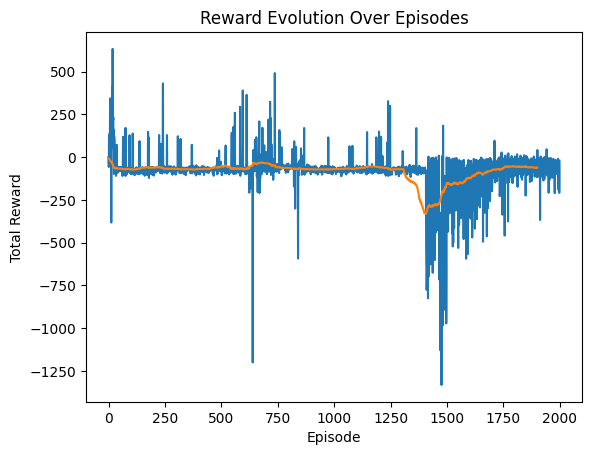

In [3]:

import matplotlib.pyplot as plt

plt.plot(reward_evolution)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
reward_evolution_smoothed = np.convolve(reward_evolution, np.ones(100)/100, mode='valid')
plt.plot(reward_evolution_smoothed)
plt.title('Reward Evolution Over Episodes')
plt.show()

In [ ]:
import os
# Save the trained algorithm
path = "./models/ONE_DDPG"
filename = "DDPG_trained_agent.pt"
os.makedirs(path, exist_ok=True)
save_path = os.path.join(path, filename)
agent.saveCheckpoint(save_path)

In [4]:
print(reward_evolution)

[0.0, -30.990645959973342, -166.4857777456442, -181.69288386901218, -178.60445936520892, -186.1259086926778, -178.627232114474, -181.6483788688977, -176.61510462562245, -188.09017399946848, -175.79175134499866, -208.25741459925968, -156.95148080587387, -186.7003762722015, -191.7808043956756, -164.2802210152149, -170.52790810664493, -176.58109078804648, -161.37744267781576, -209.44096465905506, -192.72138734658557, -170.86357792218524, -168.46891701221463, -219.2750835418701, -168.01772236824036, -126.08373771111167, -136.22623960177103, -138.7771181265513, -161.1547380685806, -165.66199511289597, -172.93026685714722, -193.01886399586994, -168.5424416263898, -245.83954632282254, -205.79949021339417, -190.65616836150485, -229.81050173441565, -206.04393710692722, -183.3863826592763, -213.6828810969988, -213.34579199552536, -204.68562523523963, -198.6443362633387, -193.09956754247344, -224.36254014571506, -171.14289030432698, -221.7410812775294, -220.36732753117877, -214.21473999818164, -2

displays 10 iterations of trained agent 

In [23]:

env = multiwalker_v9.parallel_env(render_mode='human')


field_names = ["state", "action", "reward", "next_state", "done"]
memory = ReplayBuffer(memory_size=500, field_names=field_names, action_dim=action_dim[0])
agent = DDPG(state_dim=state_dim, action_dim=action_dim[0], one_hot=one_hot)   # Create DDPG agent
# Load the trained MADDPG model
path = "./models/ONE_DDPG/DDPG5_trained_agent.pt"
DDPG.loadCheckpoint(agent,path=path)
rewards = []

for i in range(10):
    print(i, "th iteration \nrewards mean : ", np.sum(rewards))
    
    state = env.reset()[0]  # Reset environment at start of episode
    state = state['walker_0']
    done = [False]
    rewards = []
    

    while done[0] == False:
        action = agent.getAction(state)[0]    # Get next action from agent
        actions = {agent: action for agent in env.agents}
        next_state, reward, done, _, _ = env.step(actions)   # Act in environment
        if 'walker_0' in next_state.keys():
            next_state = next_state['walker_0']
            done = [True] if done['walker_0'] or done['walker_1'] or done['walker_2'] else [False]
        else :
            next_state = np.empty((31,))
            done = [True]
        reward = reward['walker_0']
        rewards.append(reward)
        memory.save2memory(state, action, reward, next_state, done)

        state = next_state

        # Learn according to learning frequency
        if len(memory) >= agent.batch_size:
            experiences = memory.sample(agent.batch_size) # Sample replay buffer
            agent.learn(experiences)    # Learn according to agent's RL algorithm


0 th iteration 
rewards mean :  0.0
1 th iteration 
rewards mean :  -100.46029340848328
2 th iteration 
rewards mean :  -100.63075843950112
3 th iteration 
rewards mean :  -104.8173560500145
4 th iteration 
rewards mean :  -106.16182847817738
5 th iteration 
rewards mean :  -103.94862012068431
6 th iteration 
rewards mean :  -101.56484457353751
7 th iteration 
rewards mean :  -99.57491247464593
8 th iteration 
rewards mean :  -103.4432251751423
9 th iteration 
rewards mean :  -102.73797124562164
